<h1> IMAGE CLASSIFICATION

<h2>1.SET UP AND LOAD DATA

In [3]:
!pip install tensorflow opencv-python matplotlib

In [5]:
!python --version

Python 3.11.11


In [24]:
!pip list

Package                           Version
--------------------------------- -------------------
absl-py                           2.1.0
aext-assistant                    4.1.0
aext-assistant-server             4.1.0
aext-core                         4.1.0
aext-core-server                  4.1.0
aext-panels                       4.1.0
aext-panels-server                4.1.0
aext-project-filebrowser-server   4.1.0
aext-share-notebook               4.1.0
aext-share-notebook-server        4.1.0
aext-shared                       4.1.0
aext-toolbox                      4.1.0
aiobotocore                       2.19.0
aiohappyeyeballs                  2.4.4
aiohttp                           3.11.10
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.13.3
altair                            5.0.1
anaconda-anon-usage               0.6.1
anaconda-catalogs                 0.2.0
anaconda-cli-base  

In [7]:
import tensorflow as tf
import os #navigate through files
import matplotlib.pyplot as plt
import numpy as np

os.path.join('data','hihi') #to make a path to our folders
os.listdir('AI') #to list out the files in a folder

In [9]:
#Avoid Out of Memory Error (OOM) by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    

<h2> 1.1 Find more data 

In [16]:
import os
import tensorflow.keras.preprocessing.image as img_prep

# Define the input and output directories
input_dir = "Data/Material_science"  # Folder containing original images
output_dir = "augmented_images"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the ImageDataGenerator
datagen = img_prep.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Process each image in the input directory
for filename in os.listdir(input_dir):
    img_path = os.path.join(input_dir, filename)
    
    try:
        # Load and preprocess image
        img = tf.keras.utils.load_img(img_path)
        x = tf.keras.utils.img_to_array(img)
        x = x.reshape((1,) + x.shape)  # Reshape to batch

        # Generate augmented images
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_format="jpg"):
            i += 1
            if i > 10:  # Change to a higher value if needed
                break
        
        print(f"Augmented {i} images for {filename}")

    except Exception as e:
        print(f"Error processing {filename}: {e}")

print("Data augmentation completed for all images!")



FileNotFoundError: [Errno 2] No such file or directory: 'Data/Material_science'

<h2>1.2 Remove dodgy images

In [11]:
import cv2
import imghdr

/var/folders/3h/skhr58nn5kzfg7t04wby785c0000gn/T/ipykernel_13460/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [37]:
data_dir = 'new_data_1'

In [15]:
image_exts = ['jpeg', 'jpg','bmp','png']

In [39]:
os.listdir(data_dir)

['.DS_Store', 'negative_data_augmented', 'positive_data_augmented']

In [43]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    
    # ✅ Ensure `image_class` is a directory before proceeding
    if not os.path.isdir(class_path):
        continue  # Skip files like ".DS_Store"

    try:
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            print(image_path)
            try:
                # Read the image
                img = cv2.imread(image_path)
                if img is None:
                    print(f"Unreadable image: {image_path}")
                    os.remove(image_path)
                    continue  # Skip to next image
                
                # Check the image format
                tip = imghdr.what(image_path)
                if tip is None or tip not in image_exts:
                    print(f"Image not in ext list: {image_path}")
                    os.remove(image_path)

            except Exception as e:
                print(f"Issue with image {image_path}: {e}")

    except Exception as e:
        print(f"Issue with directory {class_path}: {e}")

new_data_1/negative_data_augmented/_0_209.jpg
new_data_1/negative_data_augmented/_0_54.jpg
new_data_1/negative_data_augmented/_0_40.jpg
new_data_1/negative_data_augmented/_0_2715.jpg
new_data_1/negative_data_augmented/_0_7645.jpg
new_data_1/negative_data_augmented/_0_8204.jpg
new_data_1/negative_data_augmented/_0_1977.jpg
new_data_1/negative_data_augmented/_0_3812.jpg
new_data_1/negative_data_augmented/_0_2517.jpg
new_data_1/negative_data_augmented/_0_8012.jpg
new_data_1/negative_data_augmented/_0_1988.jpg
new_data_1/negative_data_augmented/_0_5522.jpg
new_data_1/negative_data_augmented/_0_5481.jpg
new_data_1/negative_data_augmented/_0_3782.jpg
new_data_1/negative_data_augmented/_0_8166.jpg
new_data_1/negative_data_augmented/_0_1624.jpg
new_data_1/negative_data_augmented/_0_5324.jpg
new_data_1/negative_data_augmented/_0_6639.jpg
new_data_1/negative_data_augmented/_0_7241.jpg
new_data_1/negative_data_augmented/_0_8172.jpg
new_data_1/negative_data_augmented/_0_3594.jpg
new_data_1/negativ

<h2>1.3 Load Data

In [45]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [47]:
data = tf.keras.utils.image_dataset_from_directory('new_data_1')

Found 2095 files belonging to 2 classes.


2025-04-01 10:36:02.032926: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-04-01 10:36:02.032955: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2025-04-01 10:36:02.032958: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.00 GB
I0000 00:00:1743518162.032968 4922419 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1743518162.032987 4922419 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [49]:
data_iterator = data.as_numpy_iterator() #to access the data, allow to loop through it

In [51]:
batch = data_iterator.next()

In [53]:
len(batch) #image, and label

2

In [55]:
batch[1]

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

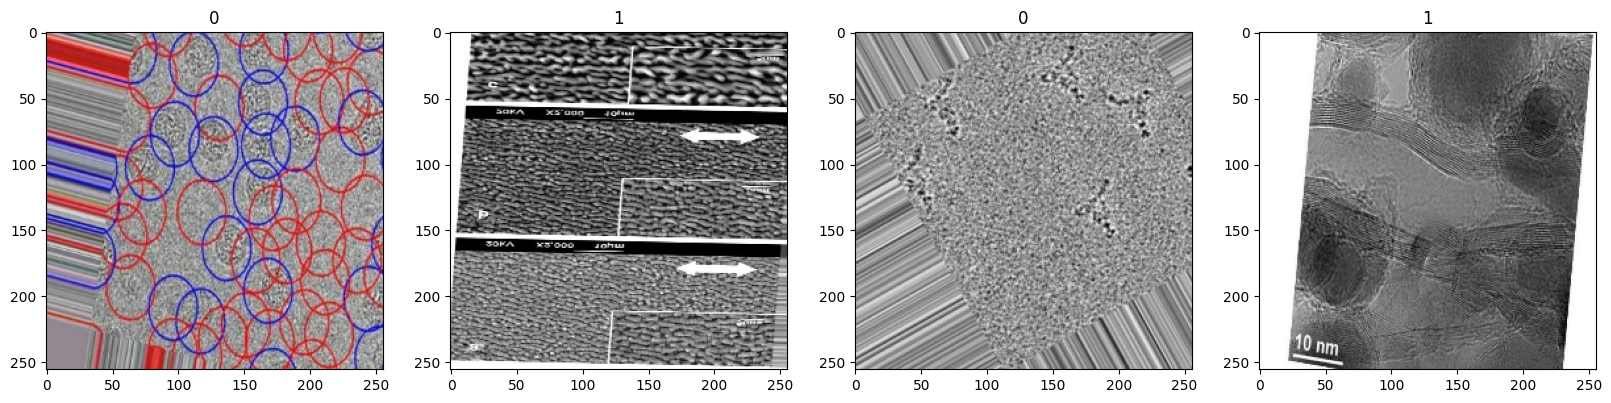

In [57]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# With this loop we can consider what is 1 and 0, 
#1 is material science, and zero is non-material science.

<h1>2. Preprocess Data

<h2>2.1 Scale Data

In [136]:
data = data.map(lambda x, y: (x / 255.0, y)) # x is image and y is label

In [138]:
scaled_iterator = data.as_numpy_iterator()

In [140]:
batch = scaled_iterator.next()

In [142]:
batch[0].max()

np.float32(0.003921569)

<h2>2.2 Split Data

In [144]:
len(data)

66

In [146]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1)

In [148]:
test_size+val_size+train_size

66

In [150]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [178]:
for example in test:
    print(example)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[1.5555916e-04, 1.2480175e-04, 1.4018045e-04],
         [1.6233585e-04, 1.3157845e-04, 1.4695716e-04],
         [1.6916571e-04, 1.3840832e-04, 1.5378701e-04],
         ...,
         [1.7079662e-03, 1.7694810e-03, 1.8156171e-03],
         [1.7857614e-03, 1.8472762e-03, 1.8934123e-03],
         [1.8124278e-03, 1.8739426e-03, 1.9200786e-03]],

        [[1.7448216e-04, 1.4372477e-04, 1.5910347e-04],
         [1.7448216e-04, 1.4372477e-04, 1.5910347e-04],
         [1.7448216e-04, 1.4372477e-04, 1.5910347e-04],
         ...,
         [1.7435001e-03, 1.8050149e-03, 1.8511510e-03],
         [1.8073324e-03, 1.8688472e-03, 1.9149833e-03],
         [1.8200031e-03, 1.8815179e-03, 1.9276540e-03]],

        [[1.9340518e-04, 1.6264778e-04, 1.7802649e-04],
         [1.8899210e-04, 1.5823470e-04, 1.7361340e-04],
         [1.8454441e-04, 1.5378701e-04, 1.6916571e-04],
         ...,
         [1.7871956e-03, 1.8487104e-03, 1.8948464e-03]

2025-04-01 10:49:19.071287: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<h1>3. Deep model

<h2>3.1 Build Deep Learning Model

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [156]:
model = Sequential()

In [158]:
                #16 filters, 3x3 pixels, move 1 pixel each time
model.add(Conv2D(16, (3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [160]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [162]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

<h2>3.2 Train</h2>

In [164]:
logdir = 'logs'

In [166]:
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [168]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.4619 - loss: 0.6960 - val_accuracy: 0.4911 - val_loss: 0.6962
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5208 - loss: 0.6925 - val_accuracy: 0.5022 - val_loss: 0.6923
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.5309 - loss: 0.6928 - val_accuracy: 0.4911 - val_loss: 0.6932
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5293 - loss: 0.6924 - val_accuracy: 0.4955 - val_loss: 0.6933
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5189 - loss: 0.6929 - val_accuracy: 0.5134 - val_loss: 0.6929
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.5268 - loss: 0.6925 - val_accuracy: 0.4955 - val_loss: 0.6936
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.5328 - loss: 0.6919 - val_accuracy: 0.4732 - val_loss: 0.6952
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5258 - loss: 0.6921 - val_accuracy: 0.5223 - v

In [93]:
hist

In [95]:
hist.history

{'accuracy': [0.4836956560611725,
  0.7479619383811951,
  0.8566576242446899,
  0.930027186870575,
  0.9307065010070801,
  0.9177989363670349,
  0.9714673757553101,
  0.9646739363670349,
  0.973505437374115,
  0.9884510636329651],
 'loss': [0.8248386979103088,
  0.5141109228134155,
  0.4469718635082245,
  0.3260209858417511,
  0.2656368911266327,
  0.2541641891002655,
  0.13621771335601807,
  0.1269189864397049,
  0.0852544903755188,
  0.06448960304260254],
 'val_accuracy': [0.5691964030265808,
  0.8794642686843872,
  0.90625,
  0.9084821343421936,
  0.8147321343421936,
  0.9107142686843872,
  0.9397321343421936,
  0.9441964030265808,
  0.921875,
  0.9308035969734192],
 'val_loss': [0.6109391450881958,
  0.4342587888240814,
  0.3775666356086731,
  0.3231104910373688,
  0.408744752407074,
  0.27263912558555603,
  0.19431264698505402,
  0.2709626257419586,
  0.3534379303455353,
  0.34629204869270325]}

<h2>3.3 Plot Performance </h2>

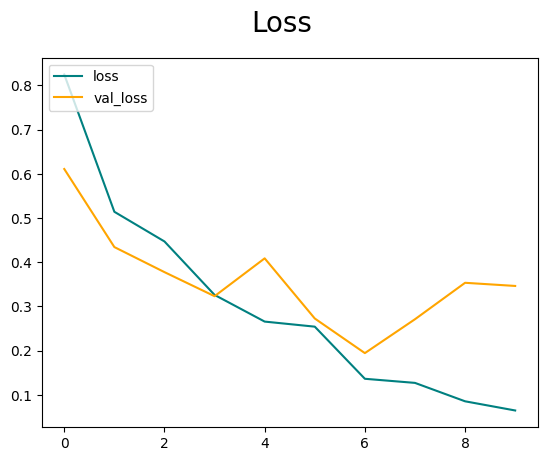

In [97]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

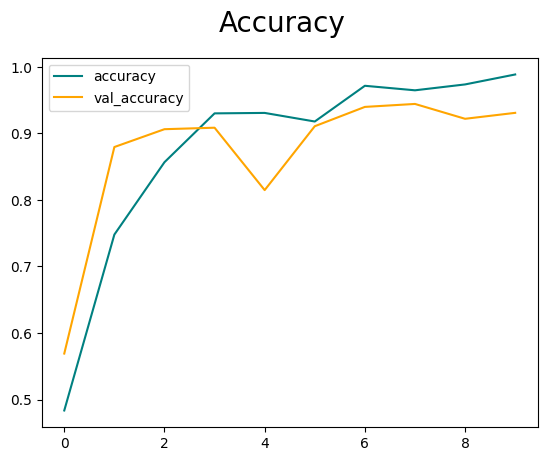

In [99]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc='upper left')
plt.show()

<h1>4. Evaluate Performance</h1>

<h2>4.1 Evaluate</h2>

In [101]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [103]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [105]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


2025-04-01 10:38:28.224108: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [157]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall: 0.9473684430122375, Accuracy: 0.9718309640884399


<h2>4.2 Test</h2>

In [194]:
for i, filepath in enumerate(test):
    if i == 1:
        img_path = filepath.numpy().decode("utf-8")
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        break

plt.imshow(img)
plt.axis('off')
plt.show()

AttributeError: 'tuple' object has no attribute 'numpy'

In [184]:
img = cv2.imread(test[1])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

TypeError: '_TakeDataset' object is not subscriptable

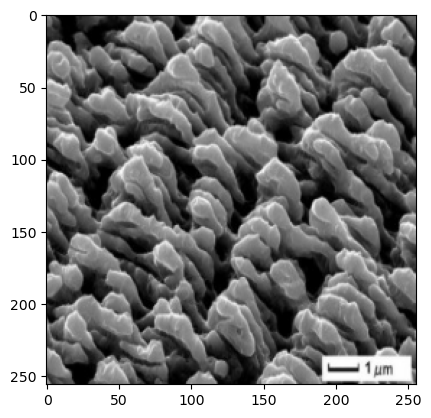

In [161]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [385]:
np.expand_dims(resize, 0)

array([[[[ 54.031494 ,  54.031494 ,  54.031494 ],
         [ 30.83789  ,  30.83789  ,  30.83789  ],
         [ 35.39917  ,  35.39917  ,  35.39917  ],
         ...,
         [ 37.500244 ,  37.500244 ,  37.500244 ],
         [ 34.835938 ,  34.835938 ,  34.835938 ],
         [ 27.03247  ,  27.03247  ,  27.03247  ]],

        [[ 51.759277 ,  51.759277 ,  51.759277 ],
         [ 29.879883 ,  29.879883 ,  29.879883 ],
         [ 41.160156 ,  41.160156 ,  41.160156 ],
         ...,
         [ 38.830566 ,  38.830566 ,  38.830566 ],
         [ 37.81714  ,  37.81714  ,  37.81714  ],
         [ 29.12915  ,  29.12915  ,  29.12915  ]],

        [[ 69.0437   ,  69.0437   ,  69.0437   ],
         [ 41.8938   ,  41.8938   ,  41.8938   ],
         [ 37.605713 ,  37.605713 ,  37.605713 ],
         ...,
         [ 29.942383 ,  29.942383 ,  29.942383 ],
         [ 36.898438 ,  36.898438 ,  36.898438 ],
         [ 27.848145 ,  27.848145 ,  27.848145 ]],

        ...,

        [[ 94.43335  ,  94.43335  ,  9

In [163]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


In [426]:
yhat

array([[0.9964858]], dtype=float32)

In [428]:
if yhat > 0.5:
    print(f'Predicted class is Material Science Picture')
else:
    print(f'Predicted class is not Material Science Picture')

Predicted class is Material Science Picture


<h1>5. Save the Model</h1>

<h2>5.1 Save the Model</h2>

In [196]:
from tensorflow.keras.models import load_model

In [198]:
model.save(os.path.join('models','material_science_13.h5'))

In [200]:
new_model = load_model(os.path.join('models','material_science_13.h5'))

In [202]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'resize' is not defined

In [416]:
if yhatnew > 0.5:
    print(f'Predicted class is Material Science Picture')
else:
    print(f'Predicted class is not Material Science Picture')

Predicted class is not Material Science Picture


<h1>6. Test Value</h1>